## Assessment Cover Page

***

### Student Full Name: Ilia Grishkin
### Student Number: 2024139
### Module Title: Machine Learning for Business
### Assessment Title: CA1
### Assessment Due Date: 27th October 2024
### Date of Submission: 

***

<div style="border: 1px solid black; padding: 10px;">

**Declaration**

By submitting this assessment, I confirm that I have read the CCT policy on academic misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. 
I declare it to be my own work and that all material from third parties has been appropriately referenced.
 I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

***

# Content 

- [Zoning Ireland: Clustering Attractions for Balanced Tourism](#section0)
    - [Etical Considaration](#section1)
    - [Objectives](#section2)
    - [Data Source and Methods](#section3)
    - [Libraries](#section4)
    - [EDA](#section5)
        - [Summary](#section5.1)
    - [Data Preparation](#section6)
        - [Missing values - EDA](#section6.1)
        - [Missing data - Handling](#section6.2)
        - [Encoding](#section6.3)
        - [Distributions](#section6.4)
        - [Unique values](#section6.5)
        - [Skewed features - EDA](#section6.6)
        - [Skewed features - Handling](#section6.7)
        - [Feature Engeneering](#section6.8)
        - [Correlations ](#section6.9)
    - [Data Modeling - Unsupervised algorithms](#section7)
        - [Prepare data](#section7.1)
        - [PCA + KMean](#section7.2)
            - [Explained and Cumulative variance ratio](#section7.2.1)
            - [Decision boundary](#section4.4)
        - [LDA + KMean](#section7.3)
            - [Decision Boundary](#section7.3.1)
        - [Feature importance](#section7.4)
        - [Evaluation](#section7.5)
            - [PCA + Kmean](#section7.5.1)
            - [LDA + KMean](#section7.5.2)
    - [Data Modeling - Supervised algorithms](#section8)
        - [Scaling](#section8.1)
        - [Categorical targets](#section8.2)
            - [PCA Transform](#section8.2.1)
            - [Define Targets](#section8.2.2)
            - [Define hyperparameters](#section8.2.3)
            - [Define Models for GridSearch](#section8.2.4)
            - [Fit Models](#section8.2.5)
        - [Numeric targets](#section8.3)
            - [Define Targets](#section8.3.1)
            - [Define hyperparameters](#section8.3.2)
            - [Define Models for GridSearch](#section8.3.3)
            - [Fit Models](#section8.3.4)
        - [Data Modeling - ANN (PyTorch) + CV](#section8.4)
        - [Evaluation](#section8.5)
            - [DFs with performance metrics](#section8.5.1)
            - [Predictability by Target (Classification)](#section8.5.1)
            - [Predictability by Target (Regression)](#section8.5.2)
            - [Predictability by Model (Classification)](#section8.5.3)
            - [Predictability by Model (Regression)](#section8.5.4)
    - [Conclusion](#section9)
- [Project Lod](#section10)
- [References](#section11)
- [Author](#section34)
***

# Zoning Ireland: Clustering Attractions for Balanced Tourism

## Etical Considaration

## Objectives

## Data Source and Methods

## Libraries

In [6]:
# pip install basemap
# conda install -c conda-forge geopandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [1]:
# General
import pandas as pd
# NLP
import re
# Visuals
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point

## EDA

In [2]:
df = pd.read_csv("Attractions.csv")
df.head()

,Name,Url,Telephone,Latitude,Longitude,Address,County,Tags
0,Hungry Boba Pizzeria,https://www.hungrybobapizzeria.ie/,0035316336814,53.351338,-6.279546,"Unit 4, 8 Grangegorman Lower, Dublin, D07 X97Y",Dublin,"Activity,Food and Drink,Experience,Restaurant,..."
1,A Rural Experience Day Tours,http://www.aruralexperience.com,00353567727590,52.629797,-7.074240,"Castlefield, Gowran,",Kilkenny,"Activity,Experience,Activity Operator,Tour"
2,Teach an Tae Aran Café & Tea Rooms,https://www.cafearan.ie/,003539975092,53.065461,-9.525287,"Inisheer, Aran Islands,",Galway,"Activity,Food and Drink,Experience,Cafe,Food S..."
3,A Heritage Walk of Old Galway,NaN,00353863480958,53.272179,-9.049473,"Mr Liam Silke, Galway City Centre,",Galway,"Activity,Experience,Walking ,Walking,Activity ..."
4,A Spasso A Dublino - Italian Tour in Dublin,https://www.aspassoperdublino.com/,00353899644861,53.342240,-6.251648,"15 Bawnville Close, ,",Dublin,"Activity,Walking ,Walking,Activity Operator,Tour"


<Figure size 3000x1500 with 0 Axes>

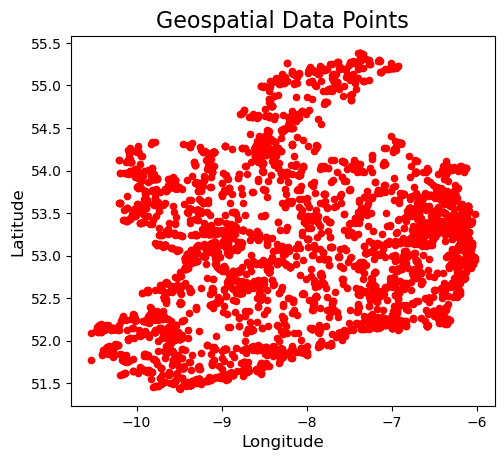

In [8]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set a larger figure size (width, height in inches)
plt.figure(figsize=(30, 15))  # You can adjust the numbers to your preference

# Plot the GeoDataFrame with larger markers
gdf.plot(marker='o', color='red', markersize=20)

# Set title and labels
plt.title('Geospatial Data Points', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()

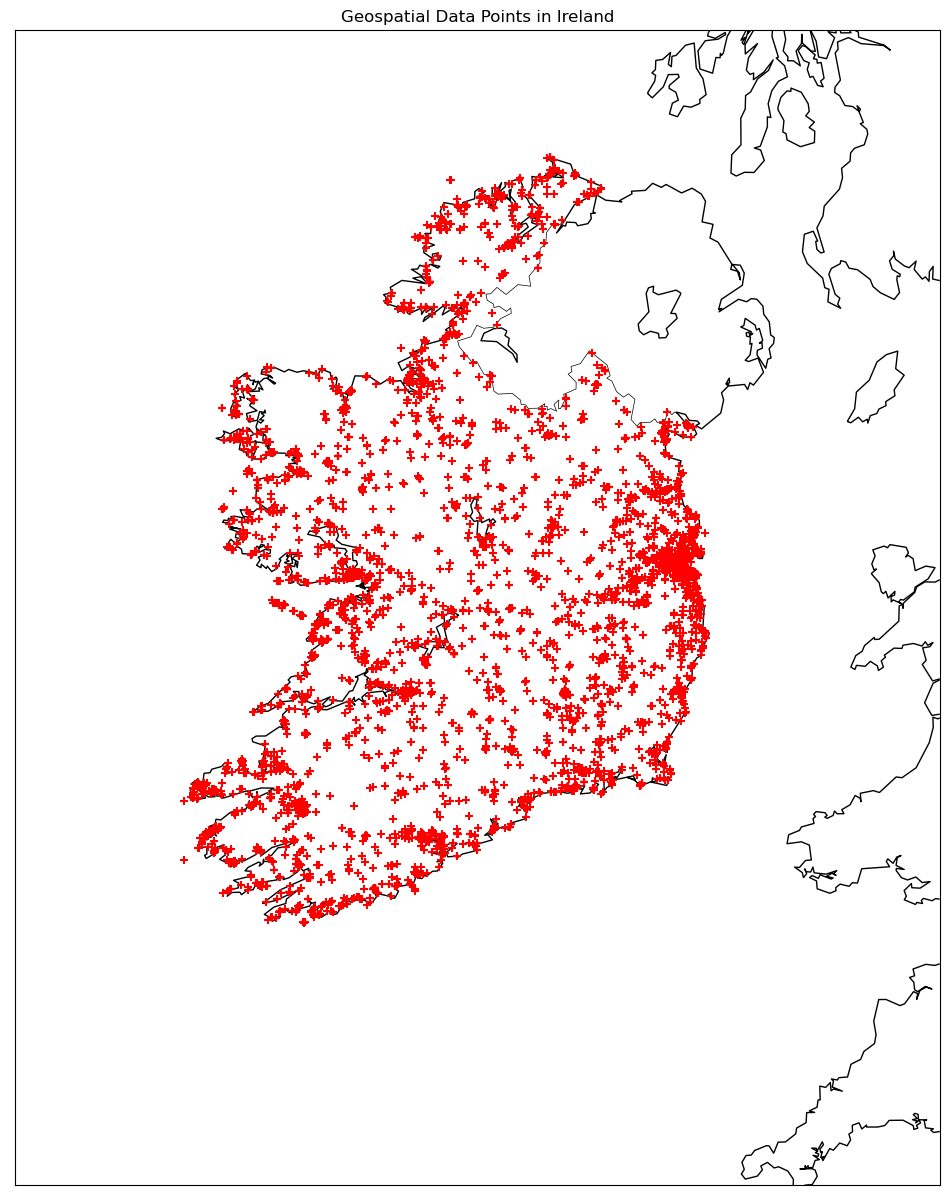

In [3]:
# Create a map of Ireland using the Mercator projection
plt.figure(figsize=(15, 15))
m = Basemap(projection='merc', llcrnrlat=50, urcrnrlat=56, llcrnrlon=-12, urcrnrlon=-4, resolution='i')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map projection coordinates
x, y = m(df['Longitude'].values, df['Latitude'].values)

# Plot data points on the map
m.scatter(x, y, marker='+', color='red', zorder=2)

# Add a title and display the plot
plt.title('Geospatial Data Points in Ireland')
plt.show()

                                             Name   Latitude  Longitude  \
0                            Hungry Boba Pizzeria  53.351338  -6.279546   
1                    A Rural Experience Day Tours  52.629797  -7.074240   
2              Teach an Tae Aran Café & Tea Rooms  53.065461  -9.525287   
3                   A Heritage Walk of Old Galway  53.272179  -9.049473   
4     A Spasso A Dublino - Italian Tour in Dublin  53.342240  -6.251648   
...                                           ...        ...        ...   
5951                                   Srah Beach  54.169230  -9.933490   
5952                              Portacloy Beach  54.331517  -9.783798   
5953                              Dunmoran Strand  54.263862  -8.728225   
5954                                 Dooey Beach   54.873450  -8.381690   
5955                            Magheroarty Beach  55.144667  -8.165131   

                                                   Tags  Activity  Food  and  \
0     Activity,Food

<Figure size 1500x1500 with 0 Axes>

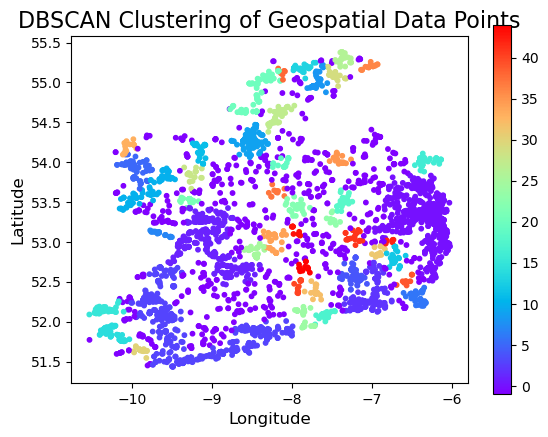

In [10]:
from sklearn.cluster import DBSCAN
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert latitude and longitude to points (use only lat/lon for clustering)
coords = df[['Latitude', 'Longitude']].values

# Apply DBSCAN (eps defines how far points should be to be considered part of the same cluster)
db = DBSCAN(eps=0.1, min_samples=15).fit(coords)

# Add cluster labels to the original dataframe
df['cluster'] = db.labels_

# Print cluster information
print(df)

# Plot the results
plt.figure(figsize=(15, 15))
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Plot points, color by cluster
gdf.plot(column='cluster', cmap='rainbow', legend=True, markersize=10)

# Set title and show the plot
plt.title('DBSCAN Clustering of Geospatial Data Points', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


## Data Preparation

### Feature selection

In [4]:
df = df.drop('Url', axis=1)
df = df.drop('Telephone', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('County', axis=1)
df.head()

,Name,Latitude,Longitude,Tags
0,Hungry Boba Pizzeria,53.351338,-6.279546,"Activity,Food and Drink,Experience,Restaurant,..."
1,A Rural Experience Day Tours,52.629797,-7.074240,"Activity,Experience,Activity Operator,Tour"
2,Teach an Tae Aran Café & Tea Rooms,53.065461,-9.525287,"Activity,Food and Drink,Experience,Cafe,Food S..."
3,A Heritage Walk of Old Galway,53.272179,-9.049473,"Activity,Experience,Walking ,Walking,Activity ..."
4,A Spasso A Dublino - Italian Tour in Dublin,53.342240,-6.251648,"Activity,Walking ,Walking,Activity Operator,Tour"


### NLP

Extract all separate words from feature "Tags"

In [5]:

def split_tags(column):
    # Use regular expression to split by comma or any whitespace
    all_words = column.str.split(r'\s*,\s*|\s+', expand=False).explode()
    # Remove any potential leading/trailing spaces and get unique words
    unique_tags = all_words.str.strip().unique()
    return unique_tags

# Extract unique words from the 'categories' column
unique_tags = split_tags(df['Tags'])

print("Unique tags:")
print(unique_tags)

Unique tags:
['Activity' 'Food' 'and' 'Drink' 'Experience' 'Restaurant' 'Fast'
 'Operator' 'Tour' 'Cafe' 'Shops' 'Shopping' 'Walking' 'Fishing' 'Angling'
 'Nature' 'Wildlife' 'Golf' 'Course' 'Attraction' 'Historic' 'Houses'
 'Castle' 'Church' 'Abbey' 'Monastery' 'Churches' 'Abbeys' 'Ruins'
 'Centres' 'Department' 'Store' '' 'Transport' 'Coach' 'Road' 'Tracing'
 'Your' 'Ancestors' 'Museums' 'Learning' 'Cycling' 'Bike' 'Rental' 'Zoos'
 'Aquarium' 'Craft' 'Bird' 'Watching' 'Climbing' 'Horse' 'Riding'
 'Equestrian' 'Kayaking' 'Kitesurfing' 'Windsurfing' 'Surfing' 'Swimming'
 'Pools' 'Water' 'Park' 'Venue' 'Island' 'Offshore' 'Artisan' 'Sailing'
 'Adventure' 'Boat' 'Pampering' 'Health' 'Farm' 'Spa' 'Wellness'
 'Specialised' 'Retreat' 'Local' 'Produce' 'Movies' 'Cinema' 'Zip'
 'Lining' 'Fitness' 'Leisure' 'Pool' 'Sports' 'Venues' 'Driving' 'Range'
 'General' 'Art' 'Gallery' 'Music' 'Day' 'Embarkation' 'Point'
 'Agriculture' 'Public' 'Sculpture' 'Seafood' 'Falconry' 'Natural'
 'Landscape' 'Ga

In [6]:
for tag in unique_tags:
    # Check if the word exists in each cell and create a new column
    df[tag] = df['Tags'].apply(lambda x: 1 if tag in re.split(r'\s*,\s*|\s+', x) else 0)


/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['Tags'].apply(lambda x: 1 if tag in re.split(r'\s*,\s*|\s+', x) else 0)
/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['Tags'].apply(lambda x: 1 if tag in re.split(r'\s*,\s*|\s+', x) else 0)
/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFr

/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['Tags'].apply(lambda x: 1 if tag in re.split(r'\s*,\s*|\s+', x) else 0)
/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['Tags'].apply(lambda x: 1 if tag in re.split(r'\s*,\s*|\s+', x) else 0)
/var/folders/xv/rzvgqjxn6p91h8mbll11tgzw0000gn/T/ipykernel_54299/3260916483.py:3: PerformanceWarning: DataFr

In [7]:
df.shape

(5956, 144)

In [ ]:
Data Modeling

In [ ]:
DBSCAN

# Project log

|  Stage  | SubStage | Planed Due to | Completed at |   Words in SubSection | Note |
|---|---|---|---|---|---|
| Project Management   | Structure  | 13.09.2024  |   |  | Create Project Log, Set Tasks |
| Project Management  | Structure | 14.09.2024  |  |   | Define Stages, Titles and Subtitles   |
| Project Management  | Methodology | 15.09.2024  |   |   | Select project management methodology  |
| Project Management  | Time Line | 16.09.2024  |  |   | Create a timeline for the project |
| Field understanding  | Literate review | 17.09.2024  |  | | From feedback: correct Harvard citation  |
| Field understanding  | Data resources  | 18.09.2024|   |   | Add original resource  |
| Field understanding  | Ethical consideration | 19.09.2024  |  |   | From feedback: Adjust Ethical Consideration  |
| Field understanding  | Objectives | 20.09.2024  |  |  | From feedback: Adjust Objectives |
| Field understanding  | Methods | 21.09.2024  |  |  | Correct methods |
| Data understanding   | EDA | 22.09.2024  |  |  | Check on missing values, duplicates |
| Data understanding   | Data set Overview  | 23.09.2024  | |  | Plotting high quality map for report |
| Data Preparation    | Feature selection | 24.09.2024  |   |     | Drop irrelevant features |
| Data Preparation   | NLP | 25.05.2024  |  |   | Separate "Tag" feature in  dummies  |
| Data Preparation   | NLP | 26.05.2024  |   |   | Test library "spacy" module "en_core_web_md" for grouping tags |
| Data Preparation   | NLP | 27.05.2024  |  |   | Group tags, come up with only a few main categories, store as dummies  |
| Data Preparation   | Split Data | 28.09.2024  |   |     | Moved to Data Modeling section |
| Data Modeling   | Number of clusters | 06.05.2024  |   |   | Test different methods to define optimal number of clusters |  
| Data Modeling   | Set models | 06.05.2024  |   |   | ---- |  
| Data Modeling   | Fit models | 08.05.2024  |   |  |  ---- |  
| Evaluation   | Compare accuracy scores | 10.05.2024  |  |     | Line chart + table |
| Conclusion  | Recommendation  | 12.09.2024  |   |   | Add benefits for selection young athletes |
| Data Modeling   | Fit models  | 13.09.2024 |  |   | Merge all models into one loop, add progress bar|
| Evaluation   | Evaluation    | 14.09.2024 |    |   | Add metrics to evaluate models results |
| Evaluation   | Evaluation  | 15.09.2024  |   |   | Add discussion after each evaluation metric |